<a href="https://colab.research.google.com/github/PauloAMatos777/Star-Identification-ML/blob/main/ImagensdeSobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

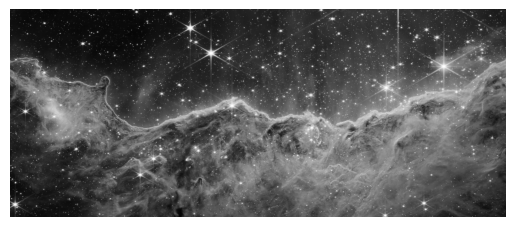

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Carregar imagem
image_path = "/content/artewk04brb91.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Exibir imagem
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
sobel_x = cv2.Sobel(image,cv2.CV_64F ,1,0,ksize=3)
sobel_y = cv2.Sobel(image,cv2.CV_64F ,1,0,ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

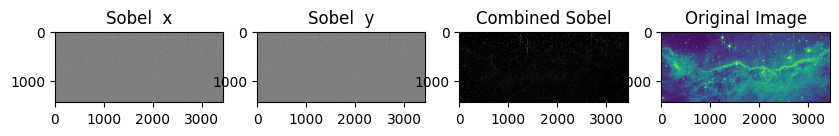

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,4,1),plt.imshow(sobel_x, cmap='gray'),plt.title('Sobel  x')
plt.subplot(1,4,2),plt.imshow(sobel_y, cmap='gray'),plt.title('Sobel  y')
plt.subplot(1,4,3),plt.imshow(sobel_combined , cmap='gray'),plt.title('Combined Sobel')
plt.subplot(1, 4, 4),plt.imshow(image),plt.title('Original Image')
plt.show()

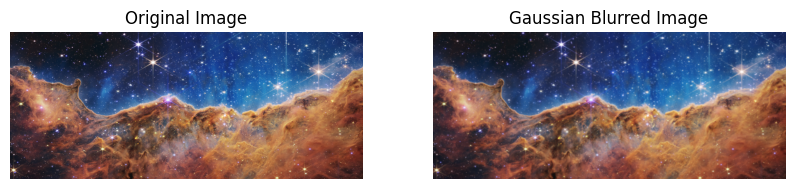

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/artewk04brb91.png')

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

# Convert BGR to RGB for displaying with matplotlib
blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)

# Display the original and blurred images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image_rgb)
plt.title('Gaussian Blurred Image')
plt.axis('off')

plt.show()

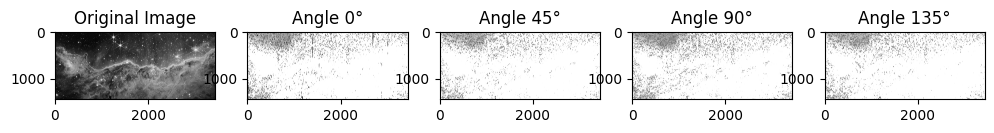

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply Gabor filter
def apply_gabor_filter(image, ksize, sigma, theta, lambd, gamma, psi):
    gabor = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
    filtered_image = cv2.filter2D(image, cv2.CV_8UC3, gabor)
    return filtered_image

# Read the image
image = cv2.imread('/content/artewk04brb91.png', cv2.IMREAD_GRAYSCALE)

# Gabor filter parameters
ksize = 31  # Kernel size
sigma = 4.0  # Standard deviation of the Gaussian function
theta_values = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Orientation of the normal to the parallel stripes of a Gabor function
lambd = 10.0  # Wavelength of the sinusoidal factor
gamma = 0.5  # Spatial aspect ratio
psi = 0  # Phase offset

# Apply Gabor filter with different orientations
filtered_images = []
for theta in theta_values:
    filtered_image = apply_gabor_filter(image, ksize, sigma, theta, lambd, gamma, psi)
    filtered_images.append(filtered_image)

# Plot the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, len(theta_values) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
for i, filtered_image in enumerate(filtered_images):
    plt.subplot(1, len(theta_values) + 1, i + 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Angle {theta_values[i]*180/np.pi:.0f}°')

plt.show()

# Nova seção

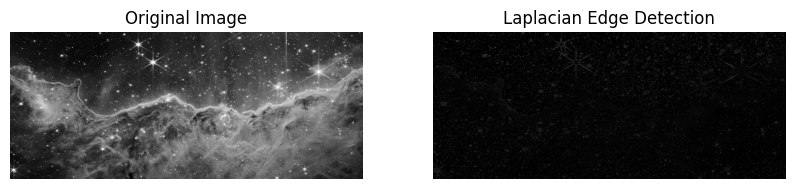

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/artewk04brb91.png', cv2.IMREAD_GRAYSCALE)

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Convert back to uint8
laplacian = cv2.convertScaleAbs(laplacian)

# Display the original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.show()

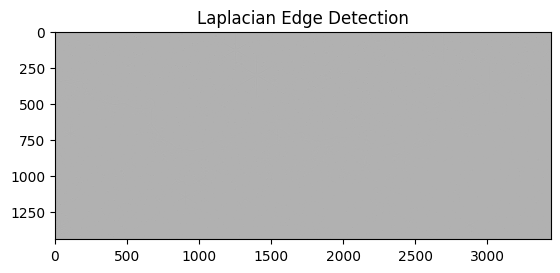

In [ ]:
laplacian =cv2.Laplacian(image , cv2.CV_64F)
plt.imshow(laplacian,cmap='gray')
plt.title('Laplacian Edge Detection')
plt.show()

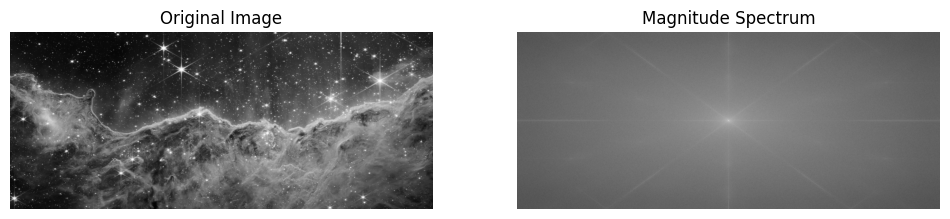

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/artewk04brb91.png', cv2.IMREAD_GRAYSCALE)

# Perform Fourier Transform
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift))

# Display the original image and its magnitude spectrum
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.show()

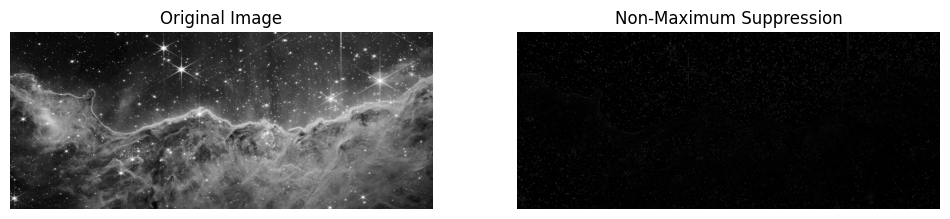

Número aproximado de Estrelas e Galáxias detectadas: 5565


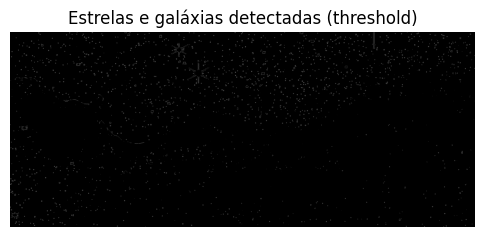

In [ ]:
import cv2
import numpy as np

def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255

                # Angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                # Angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                # Angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                # Angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass

    return Z

# Read the image
image = cv2.imread('/content/artewk04brb91.png', cv2.IMREAD_GRAYSCALE)

# Apply GaussianBlur to smooth the image
blurred = cv2.GaussianBlur(image, (5,5), 1.4)

# Compute the gradients
gx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
gy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)
magnitude = np.sqrt(gx ** 2 + gy ** 2)
angle = np.arctan2(gy, gx)

# Apply non-maximum suppression
nms_img = non_max_suppression(magnitude, angle)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(nms_img, cmap='gray')
plt.title('Non-Maximum Suppression')
plt.axis('off')

plt.show()

# Normaliza para escala de 0 a 255 (opcional)
nms_uint8 = np.uint8(nms_img / np.max(nms_img) * 255)

# Aplica um threshold para considerar apenas pontos muito brilhantes como "estrelas"
_, thresh = cv2.threshold(nms_uint8, 100, 255, cv2.THRESH_BINARY)

# Usa conectividade para contar os objetos (estrelas)
num_labels, labels_im = cv2.connectedComponents(thresh)

print(f'Número aproximado de Estrelas e Galáxias detectadas: {num_labels - 1}')  # Subtrai 1 para ignorar o fundo (label 0)

# Visualiza o threshold usado para detectar estrelas
plt.figure(figsize=(6,6))
plt.imshow(thresh, cmap='gray')
plt.title('Estrelas e galáxias detectadas (threshold)')
plt.axis('off')
plt.show()


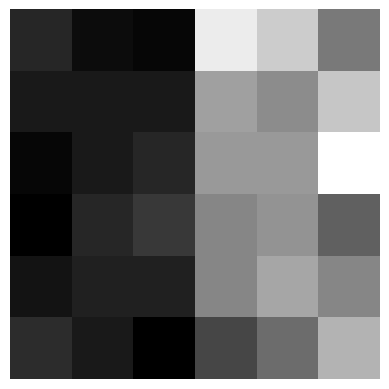

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Criar um array de exemplo com tamanho uniforme
array = np.array([
    [6,  2,  1,  37, 32, 19],
    [4,  4,  4,  25, 22, 31],
    [1,  4,  6,  24, 24, 40],
    [0,  6,  9,  21, 23, 15],
    [3,  5,  5,  21, 26, 21],
    [7,  4,  0,  11, 17, 28]
], dtype=np.uint8)

# Exibir como imagem
plt.imshow(array, cmap='gray')
plt.axis('off')
plt.show()


🔭 Estrelas detectadas: 2025
🌌 Galáxias detectadas: 1495


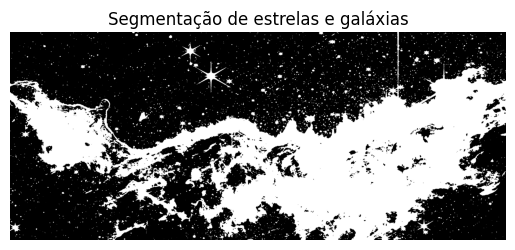

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_objects(image_path):
    """Processa a imagem e classifica objetos como estrelas ou galáxias."""
    # Carregar imagem em escala de cinza
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

    # Aplicação de threshold adaptativo para segmentação
    _, binary = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)

    # Identificação de componentes conectadas
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary)

    star_count = 0
    galaxy_count = 0

    # Análise de cada objeto detectado
    for i in range(1, num_labels):  # Ignora fundo (label 0)
        area = stats[i, cv2.CC_STAT_AREA]
        width, height = stats[i, cv2.CC_STAT_WIDTH], stats[i, cv2.CC_STAT_HEIGHT]
        aspect_ratio = width / height if height != 0 else 1

        # Critérios para classificação
        if area < 50 and aspect_ratio > 0.8 and aspect_ratio < 1.2:  # Pequenos e quase circulares
            star_count += 1
        else:  # Objetos maiores ou alongados
            galaxy_count += 1

    print(f'🔭 Estrelas detectadas: {star_count}')
    print(f'🌌 Galáxias detectadas: {galaxy_count}')

    # Visualização da segmentação
    plt.imshow(binary, cmap='gray')
    plt.title('Segmentação de estrelas e galáxias')
    plt.axis("off")
    plt.show()

# Caminho da imagem
image_path = '/content/artewk04brb91.png'
detect_objects(image_path)



Número estimado de estrelas: 1082
Número estimado de galáxias: 1153


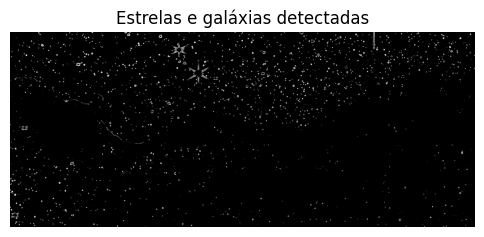

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Carregar a imagem
image = cv2.imread('/content/artewk04brb91.png', cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(image, (5,5), 1.4)

# Gradientes
gx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
gy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)
magnitude = np.sqrt(gx ** 2 + gy ** 2)

# Aplicar threshold para detectar objetos
_, thresh = cv2.threshold(np.uint8(magnitude / np.max(magnitude) * 255), 100, 255, cv2.THRESH_BINARY)
num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(thresh)

# Extrair características dos objetos detectados
features = []
for i in range(1, num_labels):
    area = stats[i, cv2.CC_STAT_AREA]
    x, y = centroids[i]
    features.append([area, x, y])

# Aplicar K-Means clustering (2 grupos: estrelas e galáxias)
features = np.array(features)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(features)
labels = kmeans.labels_

# Contagem dos clusters
num_estrelas = np.sum(labels == np.argmin(kmeans.cluster_centers_[:, 0]))  # Menores áreas -> estrelas
num_galáxias = np.sum(labels == np.argmax(kmeans.cluster_centers_[:, 0]))  # Maiores áreas -> galáxias

print(f'Número estimado de estrelas: {num_estrelas}')
print(f'Número estimado de galáxias: {num_galáxias}')

# Visualização
plt.figure(figsize=(6,6))
plt.imshow(thresh, cmap='gray')
plt.title('Estrelas e galáxias detectadas')
plt.axis('off')
plt.show()

Número estimado de estrelas: 1082
Número estimado de galáxias: 1153


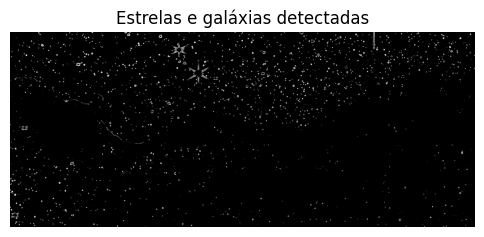

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Carregar imagem em escala de cinza
image = cv2.imread('/content/artewk04brb91.png', cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(image, (5,5), 1.4)

# Gradientes para detectar bordas
gx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
gy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)
magnitude = np.sqrt(gx ** 2 + gy ** 2)

# Limiarização da imagem
_, thresh = cv2.threshold(np.uint8(magnitude / np.max(magnitude) * 255), 100, 255, cv2.THRESH_BINARY)

# Componentes conectados
num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(thresh)

# Extrair características aprimoradas
features = []
for i in range(1, num_labels):
    area = stats[i, cv2.CC_STAT_AREA]  # Tamanho do objeto
    x, y = centroids[i]  # Posição
    brightness = np.mean(image[labels_im == i])  # Média de brilho
    eccentricity = stats[i, cv2.CC_STAT_WIDTH] / stats[i, cv2.CC_STAT_HEIGHT]  # Razão de aspecto

    features.append([area, x, y, brightness, eccentricity])

# Converter em array NumPy
features = np.array(features)

# Aplicar K-Means com 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(features)
labels = kmeans.labels_

# Definir critérios para identificar estrelas e galáxias
centroids_kmeans = kmeans.cluster_centers_
star_cluster = np.argmin(centroids_kmeans[:, 0])  # Objetos menores -> estrelas
galaxy_cluster = np.argmax(centroids_kmeans[:, 0])  # Objetos maiores -> galáxias

num_estrelas = np.sum(labels == star_cluster)
num_galáxias = np.sum(labels == galaxy_cluster)

print(f'Número estimado de estrelas: {num_estrelas}')
print(f'Número estimado de galáxias: {num_galáxias}')

# Visualizar os resultados
plt.figure(figsize=(6,6))
plt.imshow(thresh, cmap='gray')
plt.title('Estrelas e galáxias detectadas')
plt.axis('off')
plt.show()


Número estimado de estrelas: 1082
Número estimado de galáxias: 1153


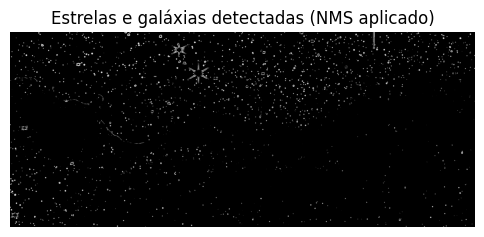

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Carregar imagem em escala de cinza
image = cv2.imread('/content/artewk04brb91.png', cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(image, (5,5), 1.4)

# Gradientes para detectar bordas
gx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
gy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)
magnitude = np.sqrt(gx ** 2 + gy ** 2)

# Limiarização da imagem
_, thresh = cv2.threshold(np.uint8(magnitude / np.max(magnitude) * 255), 100, 255, cv2.THRESH_BINARY)

# Componentes conectados
num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(thresh)

# Extrair características aprimoradas
features = []
for i in range(1, num_labels):
    area = stats[i, cv2.CC_STAT_AREA]  # Tamanho do objeto
    x, y = centroids[i]  # Posição
    brightness = np.mean(image[labels_im == i])  # Média de brilho
    eccentricity = stats[i, cv2.CC_STAT_WIDTH] / stats[i, cv2.CC_STAT_HEIGHT]  # Razão de aspecto

    features.append([area, x, y, brightness, eccentricity])

# Converter em array NumPy
features = np.array(features)

# Aplicar K-Means com 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(features)
labels = kmeans.labels_

# Definir critérios para identificar estrelas e galáxias
centroids_kmeans = kmeans.cluster_centers_
star_cluster = np.argmin(centroids_kmeans[:, 0])  # Objetos menores -> estrelas
galaxy_cluster = np.argmax(centroids_kmeans[:, 0])  # Objetos maiores -> galáxias

num_estrelas = np.sum(labels == star_cluster)
num_galáxias = np.sum(labels == galaxy_cluster)

print(f'Número estimado de estrelas: {num_estrelas}')
print(f'Número estimado de galáxias: {num_galáxias}')

# Aplicar Non-Maximum Suppression (NMS) para remover redundâncias
def non_max_suppression(objects, threshold=0.3):
    """ Remove objetos próximos para evitar duplicação """
    objects = sorted(objects, key=lambda x: x[0], reverse=True)  # Ordenar por tamanho (maiores primeiro)
    filtered_objects = []

    while objects:
        best = objects.pop(0)
        filtered_objects.append(best)
        objects = [obj for obj in objects if np.linalg.norm(np.array(best[1:3]) - np.array(obj[1:3])) > threshold]

    return filtered_objects

filtered_features = non_max_suppression(features)


# Visualizar os resultados pós-NMS
plt.figure(figsize=(6,6))
plt.imshow(thresh, cmap='gray')
plt.title('Estrelas e galáxias detectadas (NMS aplicado)')
plt.axis('off')
plt.show()


Número estimado de estrelas: 2235


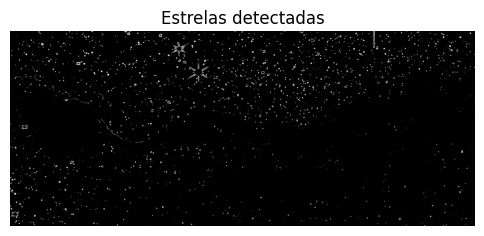

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Carregar imagem em escala de cinza
image = cv2.imread('/content/artewk04brb91.png', cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(image, (5,5), 1.4)

# Gradientes para detectar bordas
gx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
gy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)
magnitude = np.sqrt(gx ** 2 + gy ** 2)

# Limiarização da imagem
_, thresh = cv2.threshold(np.uint8(magnitude / np.max(magnitude) * 255), 100, 255, cv2.THRESH_BINARY)

# Componentes conectados
num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(thresh)

# Extrair características aprimoradas
features = []
for i in range(1, num_labels):
    area = stats[i, cv2.CC_STAT_AREA]  # Tamanho do objeto
    x, y = centroids[i]  # Posição
    brightness = np.mean(image[labels_im == i])  # Média de brilho

    features.append([area, x, y, brightness])

# Converter em array NumPy
features = np.array(features)

# Aplicar K-Means com 1 cluster (apenas estrelas)
kmeans = KMeans(n_clusters=1, random_state=42, n_init=10)
kmeans.fit(features)
labels = kmeans.labels_

num_estrelas = len(labels)

print(f'Número estimado de estrelas: {num_estrelas}')

# Visualizar os resultados
plt.figure(figsize=(6,6))
plt.imshow(thresh, cmap='gray')
plt.title('Estrelas detectadas')
plt.axis('off')
plt.show()


Número estimado de estrelas: 4725


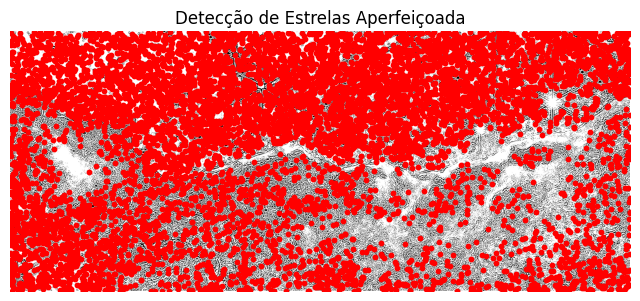

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Carregar imagem em escala de cinza e melhorar contraste
image = cv2.imread('/content/artewk04brb91.png', cv2.IMREAD_GRAYSCALE)
image = cv2.equalizeHist(image)  # Melhorando contraste

# Aplicar um desfoque Gaussiano para reduzir ruído
blurred = cv2.GaussianBlur(image, (5,5), 1.4)

# Detectar bordas usando Sobel
gx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
gy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)
magnitude = np.sqrt(gx ** 2 + gy ** 2)

# Normalizar a magnitude das bordas
magnitude = (magnitude / np.max(magnitude)) * 255
magnitude = np.uint8(magnitude)

# Aplicar um melhor limiar adaptativo para melhor segmentação
thresh = cv2.adaptiveThreshold(magnitude, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 2)

# Identificar componentes conectadas para detectar objetos
num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(thresh)

# Extrair características detalhadas
features = []
for i in range(1, num_labels):
    area = stats[i, cv2.CC_STAT_AREA]
    x, y = centroids[i]
    brightness = np.mean(image[labels_im == i])

    features.append([area, x, y, brightness])

# Converter em array NumPy
features = np.array(features)

# Definir um número mais apropriado de clusters baseado em análise estatística
n_clusters = min(3, len(features))  # Garante pelo menos 3 grupos se houver dados suficientes
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(features)
labels = kmeans.labels_

num_estrelas = sum(labels == np.argmax(np.bincount(labels)))  # Contar estrelas no cluster principal

print(f'Número estimado de estrelas: {num_estrelas}')

# Exibir a imagem processada com anotações
plt.figure(figsize=(8,8))
plt.imshow(thresh, cmap='gray')

# Plotando as estrelas detectadas
for i in range(len(features)):
    plt.scatter(features[i][1], features[i][2], color='red', s=10)

plt.title('Detecção de Estrelas Aperfeiçoada')
plt.axis('off')
plt.show()


Número estimado de galáxias: 25


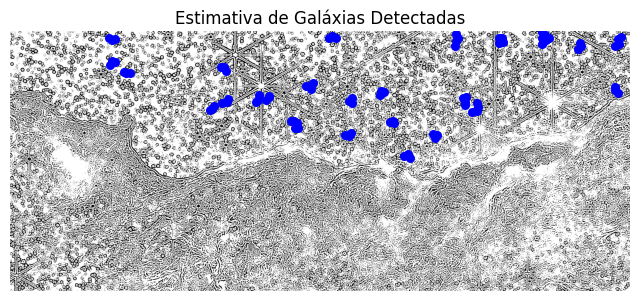

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Carregar imagem em escala de cinza e melhorar contraste
image = cv2.imread('/content/artewk04brb91.png', cv2.IMREAD_GRAYSCALE)
image = cv2.equalizeHist(image)  # Melhorando contraste

# Aplicar filtro CLAHE para melhor realce de detalhes
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
image = clahe.apply(image)

# Aplicar um desfoque Gaussiano para reduzir ruído
blurred = cv2.GaussianBlur(image, (7,7), 2.0)

# Detectar bordas usando Sobel
gx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
gy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)
magnitude = np.sqrt(gx ** 2 + gy ** 2)

# Normalizar a magnitude das bordas
magnitude = (magnitude / np.max(magnitude)) * 255
magnitude = np.uint8(magnitude)

# Aplicar um limiar adaptativo para melhor segmentação
thresh = cv2.adaptiveThreshold(magnitude, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 15, 5)

# Identificar componentes conectadas
num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(thresh)

# Extrair características detalhadas
features = []
for i in range(1, num_labels):
    area = stats[i, cv2.CC_STAT_AREA]
    x, y = centroids[i]
    brightness = np.mean(image[labels_im == i])

    # Filtrar objetos pequenos (prováveis estrelas)
    if area > 100:  # Ajuste para considerar apenas galáxias
        features.append([area, x, y, brightness])

# Converter em array NumPy
features = np.array(features)

# Aplicar DBSCAN para agrupar possíveis galáxias
dbscan = DBSCAN(eps=30, min_samples=3)
labels = dbscan.fit_predict(features[:, 1:])  # Usando coordenadas espaciais

# Contar o número de grupos identificados como galáxias
num_galaxias = len(set(labels)) - (1 if -1 in labels else 0)  # Exclui ruído

print(f'Número estimado de galáxias: {num_galaxias}')

# Exibir a imagem processada com anotações
plt.figure(figsize=(8,8))
plt.imshow(thresh, cmap='gray')

# Destacar galáxias detectadas
for i in range(len(features)):
    if labels[i] != -1:  # Exclui ruídos
        plt.scatter(features[i][1], features[i][2], color='blue', s=30)

plt.title('Estimativa de Galáxias Detectadas')
plt.axis('off')
plt.show()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 1.2207e-04 - loss: 0.6945
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step - accuracy: 0.0000e+00 - loss: 0.6804
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 877ms/step - accuracy: 0.0000e+00 - loss: 0.6762
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step - accuracy: 0.0000e+00 - loss: 0.6722
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 0.6696
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 0.6657
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 0.6601
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 0.6515
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 0.6402
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step - accuracy: 0.0000e+00 - loss: 0.6314
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


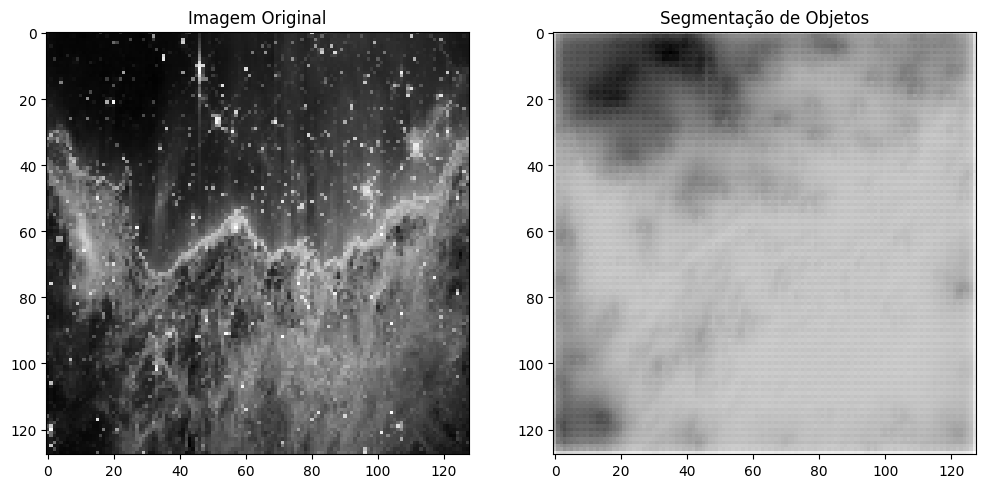

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, Input, concatenate
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Função para carregar e pré-processar a imagem
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))  # Ajustando para tamanho padrão
    image = image / 255.0  # Normalizando
    image = np.expand_dims(image, axis=-1)  # Adicionando canal extra
    return image

# Carregar a imagem e preparar os dados
image_path = '/content/artewk04brb91.png'  # Substitua pelo caminho correto
image = load_image(image_path)
X_train = np.expand_dims(image, axis=0)  # Criando batch único

# Definição da U-Net
def build_unet(input_shape=(128, 128, 1)):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)

    # Bottleneck
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)

    # Decoder
    up1 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv3)
    merge1 = concatenate([up1, conv2])
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(merge1)

    up2 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv4)
    merge2 = concatenate([up2, conv1])
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge2)
    conv5 = Conv2D(1, (1, 1), activation='sigmoid')(conv5)  # Saída para segmentação

    return Model(inputs, conv5)

# Criar e compilar a U-Net
model = build_unet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento fictício com uma única amostra
y_train = np.expand_dims(image, axis=0)  # Criando máscara falsa para treino
model.fit(X_train, y_train, epochs=10)

# Fazer predição
predicted_mask = model.predict(np.expand_dims(image, axis=0))[0]

# Exibir imagem original e segmentação
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Imagem Original')

plt.subplot(1,2,2)
plt.imshow(predicted_mask.squeeze(), cmap='gray')
plt.title('Segmentação de Objetos')

plt.show()

